<a href="https://colab.research.google.com/github/rodrimdz/Hourly-Energy-Consumption/blob/gh-pages/HourlyEnergyConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hourly Energy Consumption

**Over 10 years of hourly energy consumption data from PJM in Megawatts. From October 2004 to August 2018.**

PJM Interconnection is a regional transmission organization (RTO) that coordinates the movement of wholesale electricity in all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia and the District of Columbia. 


In this dataset we only have daily hourly records and the corresponding energy consumption. Some questions that we can ask now and will be answered later are:
How is energy consumption distributed? What is the average consumption?
How is consumption distributed per hour? and also, will it be the same from January to July or October?
How has consumption behaved over the years? Will it decrease because there is more population or will it decrease due to advances in energy efficiency?

**Import some important libraries**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from datetime import datetime
import seaborn as sns

**Import dataset from my github**

In [26]:
data=pd.read_csv("https://github.com/rodrimdz/Hourly-Energy-Consumption/blob/gh-pages/AEP_hourly.csv?raw=true")
data.iloc[::-1]
data.shape


(121273, 2)

**The dataset is imported, this is the raw data**

In [27]:
data.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


**A preliminary look about highlights of consumption energy**

In [28]:
data.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


**Date of highest consumption energy**

In [29]:
data[data["AEP_MW"] == data["AEP_MW"].max()]

,Datetime,AEP_MW
30221,2008-10-20 14:00:00,25695.0


**Date of lowest consumption energy**

In [30]:
data[data["AEP_MW"] == data["AEP_MW"].min()]

,Datetime,AEP_MW
100759,2016-10-02 05:00:00,9581.0


**How are the consumptions distributed? where are the consumptions that are repeated the most? here the answer:**

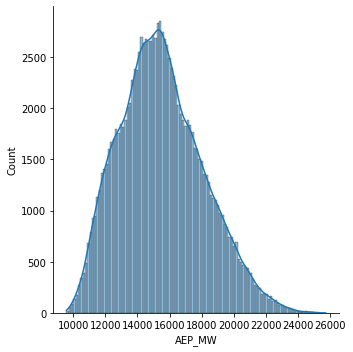

In [31]:
sns.displot(data=data, x=data["AEP_MW"], kde=True)

**I work a little with the data, hour, year and month are separated**

In [32]:
data["New_Date"] = pd.to_datetime(data["Datetime"]).dt.date
data["New_Time"] = pd.to_datetime(data["Datetime"]).dt.time
data["Time"]=data["New_Time"].astype("string")
times=data["Time"].str.split(":",1, expand = True)
data["Time"]=times[0]
data["Time"]=pd.to_numeric(data["Time"])
data["Year"] = pd.DatetimeIndex(data['New_Date']).year
data["Month"] = pd.DatetimeIndex(data['New_Date']).month
data.head()

,Datetime,AEP_MW,New_Date,New_Time,Time,Year,Month
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,1,2004,12
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2,2004,12
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00,3,2004,12
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00,4,2004,12
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00,5,2004,12


**What is the relationship between the data, especially between consumption and hour, month, year?
It is observed that there is a certain level of correlation between time and consumption. 
This will be analyzed in detail later.**

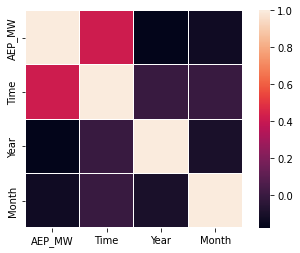

In [33]:
corr=data.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,square=True,linewidths=.1)

**Average consumption per year, a downward trend is observed.** 



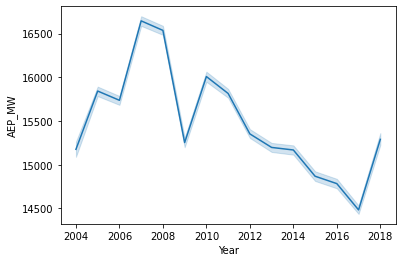

In [34]:
sns.lineplot(x=data["Year"],y=data["AEP_MW"], data=data)

**Average total consumption per month, changes are observed in the coldest and warmest months**

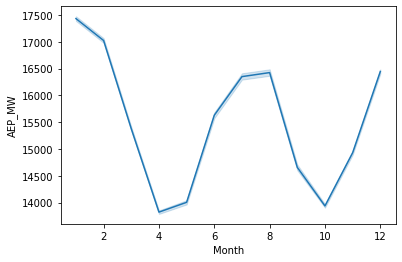

In [35]:
sns.lineplot(x=data["Month"],y=data["AEP_MW"])

**Average consumption per month, each graph corresponds to each year. The trend of high and low values is repeated every year.**

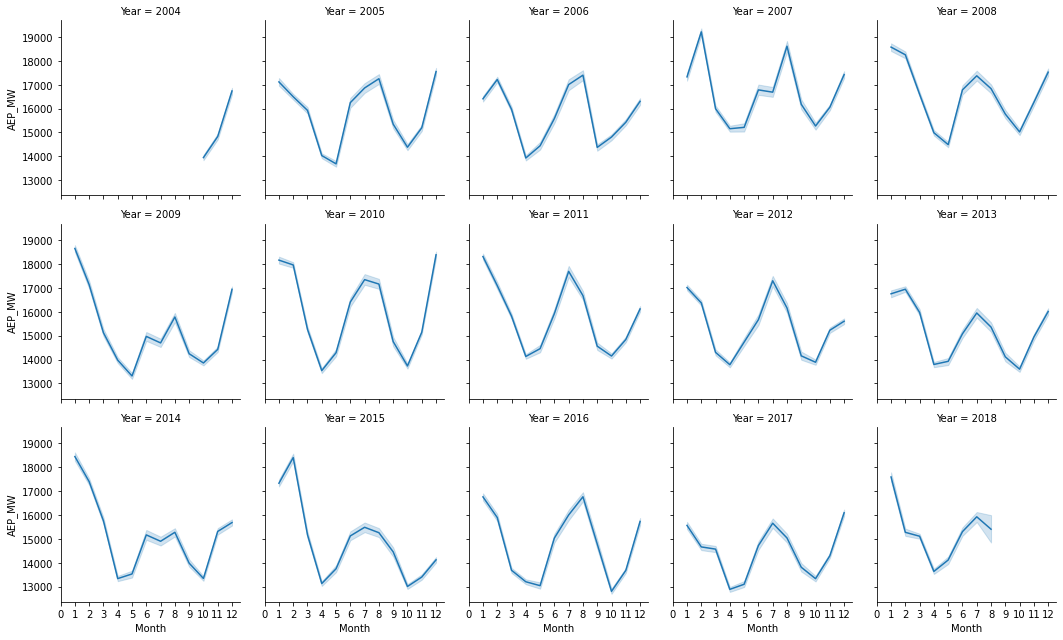

In [36]:
g=sns.relplot(x=data["Month"],y=data["AEP_MW"], col=data["Year"],kind="line",col_wrap=5, height=3)
g.set(xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12])

**Average total consumption per hour. There is a downward trend in the night hours and an upward trend in the daytime hours. But, every month the same thing will happen? will there be a difference in winter months and summer months? Let's see**

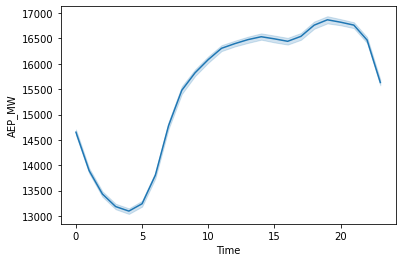

In [37]:
sns.lineplot(x=data["Time"],y=data["AEP_MW"])

**Average consumption per hour, for each month. Here we can see that the consumption changes a lot for each month, even the consumption trend changes in the same hour and different month.**

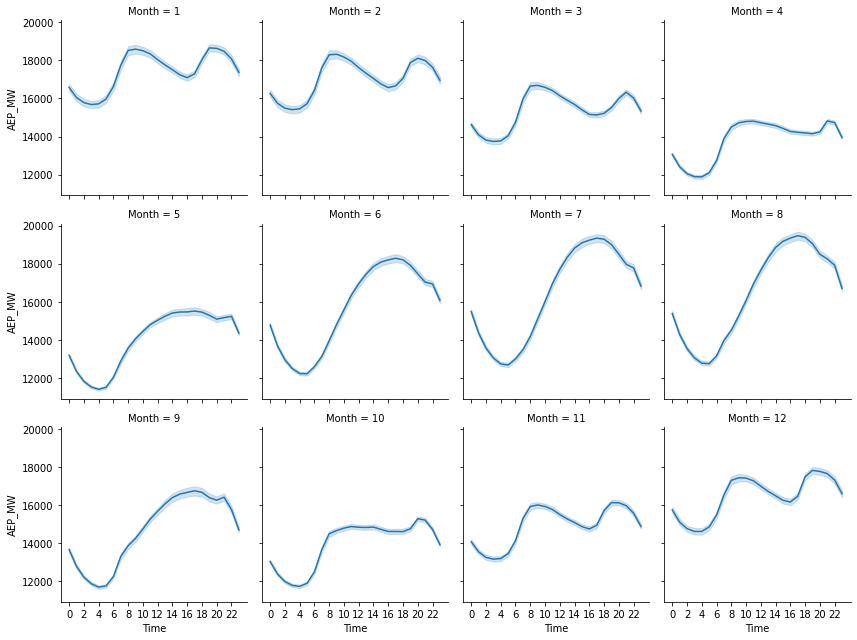

In [38]:
g=sns.relplot(x=data["Time"],y=data["AEP_MW"], col=data["Month"],kind="line",col_wrap=4, height=3)
g.set(xticks=[0,2,4,6,8,10,12,14,16,18,20,22])

**Here all the previous graphs in the same plot**

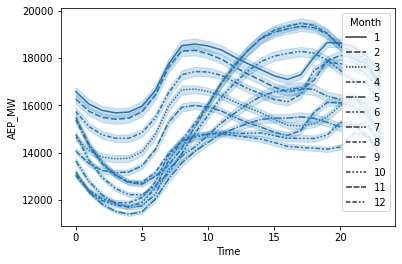

In [39]:
  sns.lineplot(x=data["Time"],y=data["AEP_MW"],style=data["Month"])

**Linear and polynomial regression applied to consumption per hour**

**The model is built**

In [40]:
time=data.groupby(["Time"]).mean()
time["Time"]=time.index
time=time.drop(columns=["Month","Year"])
x=time["Time"]
y=time["AEP_MW"]
x=x.values.reshape(-1,1)
lm=LinearRegression()
lm.fit(x,y)


LinearRegression()

**The linear model is applied, but it is not very representative. We can try to make a polynomial model.**

In [41]:
lm.score(x,y)

0.6772146586776093

**Graph of consumption per hour and our model, it is observed that it follows the trend but does not fit well.**

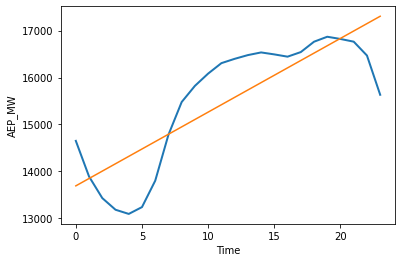

In [42]:
sns.lineplot(x=time["Time"],y=y, data=time, linewidth=2)
sns.lineplot(x=time["Time"],y=lm.predict(x))

In [43]:
def regresion_validation(x,y,y_pred):
    SSD=np.sum((y-lm.predict(x))**2)
    RSE=np.sqrt(SSD/(len(x)-1))
    y_mean=np.mean(y)
    error=RSE/y_mean
    print("Score: "+str(lm.score(x,y)))
    print("SSD: "+str(SSD)+", RSE: "+str(RSE)+", y_mean: "+str(y_mean)+", error: "+str(error*100)+"\n")

**The polynomial model of degree 1 to 5 is applied, the regression model of degree 5 is the one that best fits.**

Regression grade 1
Score: 0.6772146586776089
SSD: 13523082.835598724, RSE: 766.7855784291336, y_mean: 15499.125916017054, error: 4.947282721516086

Regression grade 2
Score: 0.7642869987637788
SSD: 9875189.586014472, RSE: 655.2526756581395, y_mean: 15499.125916017054, error: 4.227675026376749

Regression grade 3
Score: 0.8775519152808168
SSD: 5129959.080341484, RSE: 472.2729074860021, y_mean: 15499.125916017054, error: 3.047093817064532

Regression grade 4
Score: 0.9348741599265397
SSD: 2728445.24612948, RSE: 344.4242357609908, y_mean: 15499.125916017054, error: 2.22221716003389

Regression grade 5
Score: 0.978116699741088
SSD: 916800.251539235, RSE: 199.65189831731095, y_mean: 15499.125916017054, error: 1.288149405322189



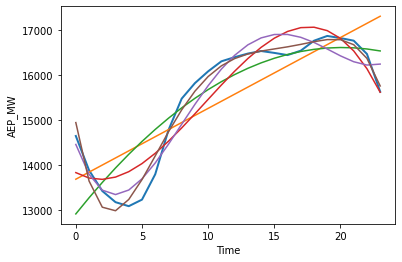

In [44]:
sns.lineplot(x=time["Time"],y=y, data=time, linewidth=2)
for d in range(1,6):
    poly =PolynomialFeatures(degree=d)
    xpoly=poly.fit_transform(x)
    lm=linear_model.LinearRegression()
    lm.fit(xpoly,y)
    print("Regression grade "+str(d))
    regresion_validation(xpoly,y,lm.predict(xpoly))
    
    sns.lineplot(x=time["Time"],y=lm.predict(poly.fit_transform(x)))

**Here only the graph of the grade 5 model, we see that it is very similar. Therefore, the built model fits well.**

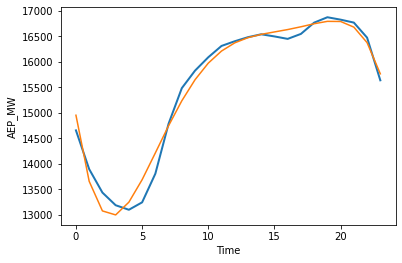

In [45]:
poly =PolynomialFeatures(5)
xpoly=poly.fit_transform(x)
lm=linear_model.LinearRegression()
lm.fit(xpoly,y)
sns.lineplot(x=time["Time"],y=y, data=time, linewidth=2)
sns.lineplot(x=time["Time"],y=lm.predict(poly.fit_transform(x)))